<a href="https://colab.research.google.com/github/Naitik582/New_York_City_NYC/blob/main/AB_NYC_2019_csv_(New_York).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv


New York City


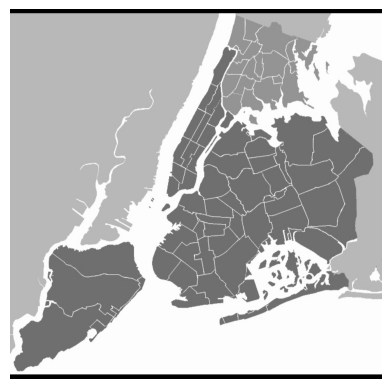

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print ("New York City")
image_path = "New York City.jpg"  # Ensure correct filename from os.listdir()
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis("off")  # Hide axis
plt.show()

In [ ]:
import pandas as pd
print ("Load The Dataset")
file_path = "AB_NYC_2019.csv"
df = pd.read_csv(file_path)

df.head()

Load The Dataset


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
print ("Checking For Missing Values")

df.isnull().sum()

Checking For Missing Values


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
print ("Missing Values Handle")

df['name'].fillna("Unknown", inplace=True)
df['host_name'].fillna("Unknown", inplace=True)

df['last_review'].fillna("No Review", inplace=True)

df['reviews_per_month'].fillna(0, inplace=True)

print(df.isnull().sum())

Missing Values Handle
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


<ipython-input-33-9475f1a76424>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna("Unknown", inplace=True)
<ipython-input-33-9475f1a76424>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
df = df.copy()

df['name'] = df['name'].fillna("Unknown")
df['host_name'] = df['host_name'].fillna("Unknown")
df['last_review'] = df['last_review'].fillna("No Review")
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

df = df.dropna(subset=["last_review"])

In [ ]:
df["reviews_per_month"].fillna(df["reviews_per_month"].median(), inplace=True)
df.dropna(subset=["last_review"], inplace=True)

<ipython-input-35-38938b8f98e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(df["reviews_per_month"].median(), inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
import numpy as np

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

In [ ]:
cleaned_file_path = "AB_NYC_2019_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

from google.colab import files
files.download(cleaned_file_path)

print("Cleaned dataset saved and ready for download!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaned dataset saved and ready for download!
